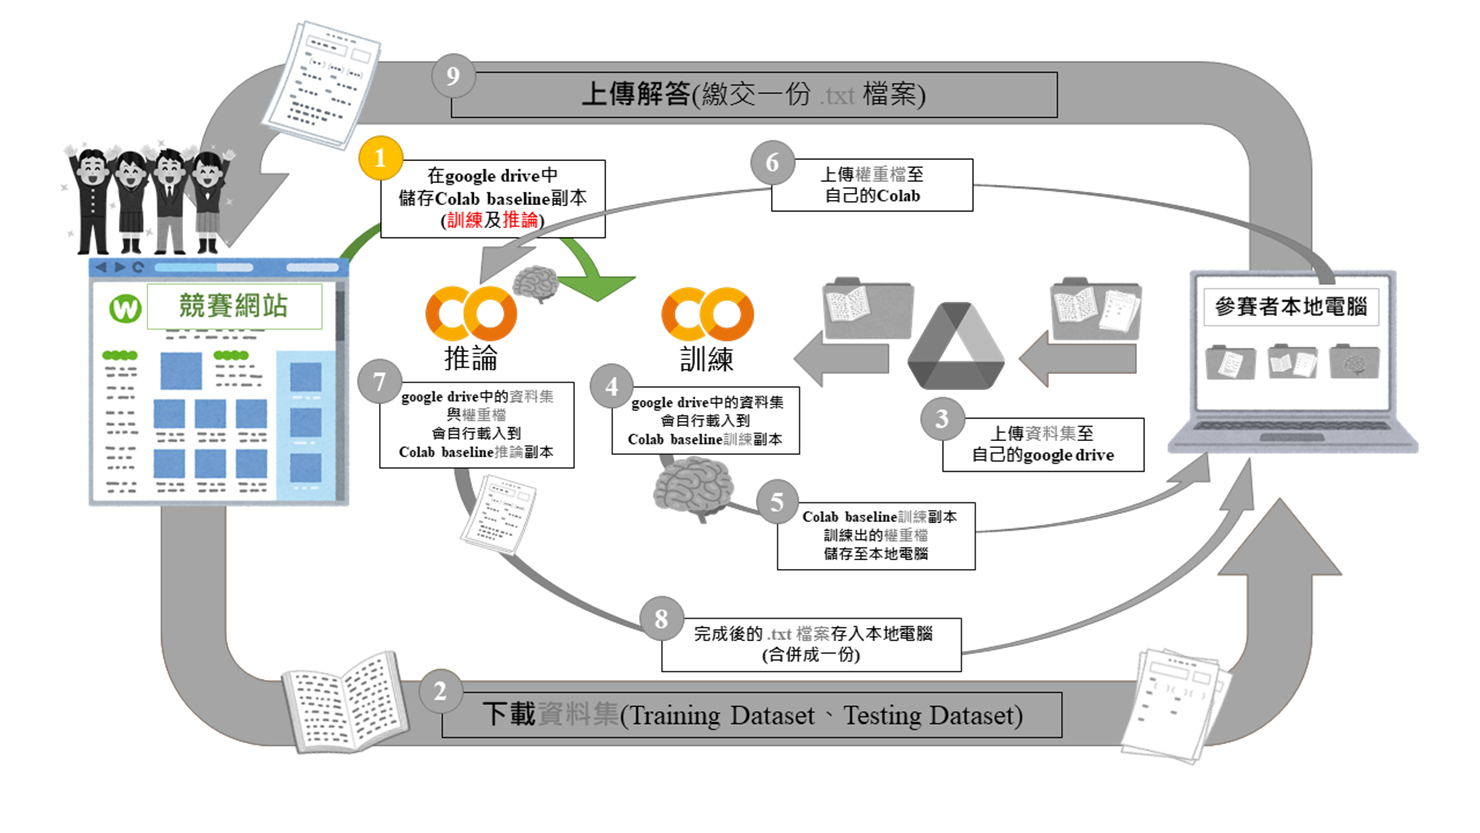

In [1]:
!nvidia-smi

Tue Nov 25 10:45:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090      WDDM  |   00000000:01:00.0  On |                  N/A |
| 56%   66C    P2            235W /  350W |    3617MiB /  24576MiB |     55%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
import torch
import torchvision

print("### PyTorch / CUDA / cuDNN")
print(f"- torch：{torch.__version__}")
print(f"- torchvision：{torchvision.__version__}")
print(f"- CUDA 可用：{torch.cuda.is_available()}")

# 只有在 CUDA 可用時才能查以下資訊
if torch.cuda.is_available():
    print(f"- CUDA 版本（torch）：{torch.version.cuda}")
    print(f"- cuDNN 版本：{torch.backends.cudnn.version()}")
    print(f"- GPU 名稱：{torch.cuda.get_device_name(0)}")
else:
    print("無法使用 GPU")

### PyTorch / CUDA / cuDNN
- torch：2.9.1+cu126
- torchvision：0.24.1+cu126
- CUDA 可用：True
- CUDA 版本（torch）：12.6
- cuDNN 版本：91002
- GPU 名稱：NVIDIA GeForce RTX 3090


In [2]:
# !pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.228  Python-3.11.14 torch-2.9.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Setup complete  (20 CPUs, 63.9 GB RAM, 786.6/953.2 GB disk)


#### 3. Predict

#=====================================================

#BLOCK 7

#使用訓練過模型進行預測圖片
#=====================================================

In [ ]:
from ultralytics import YOLO
model = YOLO(r'.\runs\detect\11n\weights\best.pt')
results = model.predict(source="./datasets_0/test/images",
              save=True,
              imgsz=640,
              device=0
              )


WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/16620 c:\Users\Tien\YOLO\datasets_0\test\images\patient0051_0001.png: 640x640 (no detections), 21.0ms
image 2/16620 c:\Users\Tien\YOLO\datasets_0\test\images\patient0051_0002.png: 640x640 (no detections), 32.5ms
image 3/16620 c:\Users\Tien\YOLO\datasets_0\test\images\patient0051_0003.png: 640x640 1 aortic_valve, 22.6ms
image 4/16620 c:\Users\Tien\YOLO\datasets_0\test\images\patient0051_0004.png: 640x640 (no detections), 34.0ms
image 5/16620 c:\Use

#predict資料夾內**有圖片代表預測完成**


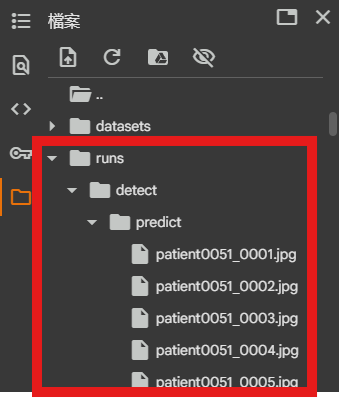

#=====================================================

#BLOCK 9

#預測數量

#=====================================================

In [4]:
print(len(results))

16620


#=====================================================

#BLOCK 10

#取得預測結果的資訊

#想取得更多資訊可參考官方說明
#https://docs.ultralytics.com/zh/modes/predict/#boxes

#=====================================================

In [5]:
print('預測類別 : ',results[260].boxes.cls[0].item())
print('預測信心分數 : ',results[260].boxes.conf[0].item())
print('預測框座標 : ',results[260].boxes.xyxy[0].tolist())

預測類別 :  0.0
預測信心分數 :  0.7706853151321411
預測框座標 :  [215.00234985351562, 243.8617706298828, 259.92706298828125, 312.90460205078125]


#=====================================================

#BLOCK 11

#將偵測框數值寫進.txt檔

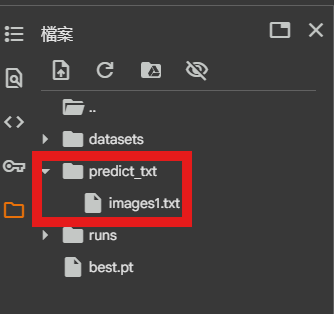

#=====================================================

In [6]:
from pathlib import Path  # 引入 pathlib

# !mkdir ./predict_txt/ (如果在 Jupyter Notebook 中執行)
# 確保目錄存在 (Python 寫法)
import os
os.makedirs('./predict_txt/', exist_ok=True)

output_file = open('./predict_txt/11n_0.txt', 'w')

for i in range(len(results)):
    # --- 修改重點開始 ---
    # 使用 Path(路徑).stem 直接取得檔名 (不含副檔名與路徑)
    # 這會自動把 "c:\...\patient0051_0125.png" 變成 "patient0051_0125"
    filename = Path(results[i].path).stem
    # --- 修改重點結束 ---

    # 取得預測框數量
    boxes = results[i].boxes
    box_num = len(boxes.cls.tolist())

    # 如果有預測框
    if box_num > 0:
        for j in range(box_num):
            # 提取資訊
            label = int(boxes.cls[j].item())  # 類別
            conf = boxes.conf[j].item()       # 信心度
            x1, y1, x2, y2 = boxes.xyxy[j].tolist()  # 邊界框座標

            # 建立一行資料
            line = f"{filename} {label} {conf:.4f} {int(x1)} {int(y1)} {int(x2)} {int(y2)}\n"
            output_file.write(line)

# 關閉輸出檔案
output_file.close()
print("處理完成，檔案已儲存。")

處理完成，檔案已儲存。
